# EC2202 Homework #9 (Due: 1:00 pm, Jun. 2, 2022)

**Disclaimer**
This homework is based on
1. [GeeksForGeeks](https://practice.geeksforgeeks.org/home)
2. [MIT SMA 5503](https://ocw.mit.edu/courses/6-046j-introduction-to-algorithms-sma-5503-fall-2005/)


## Submission Link

Submit [here](https://docs.google.com/spreadsheets/d/1q7F1LzYzUwa6sy3g8QPTsa9skRD5qRgCr_ibLP0F0hc/edit?usp=sharing)

## Student Information

* Student ID: 20215133
* Name: 유지연

## Evaluation Code Setting

Run the blow to test your implementation :)

In [1]:
import doctest

## Q1
Implement the `element()` of Class `Node`. The class `Node()` is for 23Tree not 234Tree.

Your task is to complete `element()` which takes the **value** as a parameter and returns True if the given value exists in 23Tree, else returns False. You don't have to create a new 23Tree.

Hint: You can get ideas from `search()`. The function `search()` returns the node instead of Boolean value.

Code from [Source](https://github.com/strictlysimpledesign/23tree)


In [44]:
def test_case(d_list):
  tree = Node(100)

  for data in d_list:
    tree.insert(data)
  
  return tree

class Node(object): ## Class for 23Tree
  """
  >>> tree = test_case([4, 3, 21, 8, 49, 10, 51, 15, 9, 40])

  >>> tree.element(4)
  True
  >>> tree.element(11)
  False
  >>> tree.element(8)
  True
  >>> tree.element(15)
  True
  >>> tree.element(3)
  True
  >>> tree.element(12)
  False
  >>> tree.element(20)
  False
  >>> tree.element(9)
  True
  >>> tree.element(1)
  False
  >>> tree.element(40)
  True
  """

  path = []

  def __init__(self, data, parent=None):
    self.childs = {}
    self.data = [data]
    self.parent = parent

  def insert(self, value):
    Node.path = []
    insert_node = self.search(value)
    insert_node.add(value)

  def split(self):
    if self.parent is None and self.childs:
      branch = Node.path.pop()
      newNodeLeft = Node(self.data.pop(0), self)
      newNodeRight = Node(self.data.pop(1), self)           
      if branch == "left":
        newNodeLeft.childs["left"] = self.childs["left"]
        newNodeLeft.childs["right"] = self.childs["overflow"]
        newNodeRight.childs["left"] = self.childs["mid"]
        newNodeRight.childs["right"] = self.childs["right"]
      elif branch == "mid":
        newNodeLeft.childs["left"] = self.childs["left"]
        newNodeLeft.childs["right"] = self.childs["mid"]
        newNodeRight.childs["left"] = self.childs["overflow"]
        newNodeRight.childs["right"] = self.childs["right"]
      elif branch == "right":
        newNodeLeft.childs["left"] = self.childs["left"]
        newNodeLeft.childs["right"] = self.childs["mid"]
        newNodeRight.childs["left"] = self.childs["right"]
        newNodeRight.childs["right"] = self.childs["overflow"]
      newNodeLeft.childs["left"].parent = newNodeLeft
      newNodeLeft.childs["right"].parent = newNodeLeft
      newNodeRight.childs["left"].parent = newNodeRight
      newNodeRight.childs["right"].parent = newNodeRight
      self.childs["left"] = newNodeLeft
      self.childs["right"] = newNodeRight
      del self.childs["mid"]

    elif self.parent is not None and self.childs:
      branch = Node.path.pop()
      newNode = Node(self.data.pop(), self.parent)
      self.parent.childs["overflow"] = newNode
      if branch == "left": 
        newNode.childs["left"] = self.childs["mid"]
        newNode.childs["right"] = self.childs["right"]
        self.childs["right"] = self.childs["overflow"]
      elif branch == "mid":
        newNode.childs["left"] = self.childs["overflow"]
        newNode.childs["right"] = self.childs["right"]
        self.childs["right"] = self.childs["mid"]
      elif branch == "right":
        newNode.childs["left"] = self.childs["right"]
        newNode.childs["right"] = self.childs["overflow"]
        self.childs["right"] = self.childs["mid"]
      newNode.childs["left"].parent = newNode
      newNode.childs["right"].parent = newNode
      del self.childs["mid"]

    elif self.parent is None and not self.childs:
      self.childs["left"] = Node(self.data.pop(0), self)
      self.childs["right"] = Node(self.data.pop(1), self)  

    elif self.parent is not None and not self.childs:
      self.parent.childs["overflow"] = Node(self.data.pop(), self.parent) 
      
        
  def add(self, value):
    if value not in self.data:
      self.data.append(value)
      self.data.sort()
      if len(self.data) == 3:
        self.split()
        if self.parent is not None:
          self.parent.add(self.data.pop())
      else:
        if "overflow" in self.childs:
          branch = Node.path.pop()
          if branch == "left":
            self.childs["mid"] = self.childs["overflow"]
          elif branch == "right":
            self.childs["mid"] = self.childs["right"]
            self.childs["right"] = self.childs["overflow"]
          del self.childs["overflow"]

  def search(self, value):  
    if self.childs:
      boundLeft = min(self.data)
      boundRight = max(self.data)
      if value < boundLeft:
        Node.path.append("left")
        return self.childs["left"].search(value)
      elif value > boundRight:
        Node.path.append("right")
        return self.childs["right"].search(value)
      else:
        Node.path.append("mid")
        return self.childs["mid"].search(value)
    else:
       return self 

  def element(self, value):
    if self.childs:
      boundLeft = min(self.data)
      boundRight = max(self.data)
      if value < boundLeft:
        Node.path.append("left")
        if value in self.childs["left"].search(value).data:
          return True
        return False
      elif value > boundRight:
        Node.path.append("right")
        if value in self.childs["right"].search(value).data:
          return True
        return False
      else:
        Node.path.append("mid")
        if value in self.childs["mid"].search(value).data:
          return True
        return False
    else:
       return self.data == value
   

In [ ]:
doctest.run_docstring_examples(Node, globals(), False, __name__)

## Q2
[MIT SMA 5503]

First, assign the keys 2, 3, 5, 7, 11, 13, 17, 19 to the nodes of the binary search tree below so that they satisfy the binary-search-tree property.

Then, draw the red-black tree that results, labeling each node with “red” or “black". (The binary search tree can be transformed into a red-black tree by performing a single rotation.)

<img src="https://i.ibb.co/RQZ6jRx/Screen-Shot-2022-05-26-at-3-05-15-AM.png" width="500"/>

italic with star: red\
no notation: black
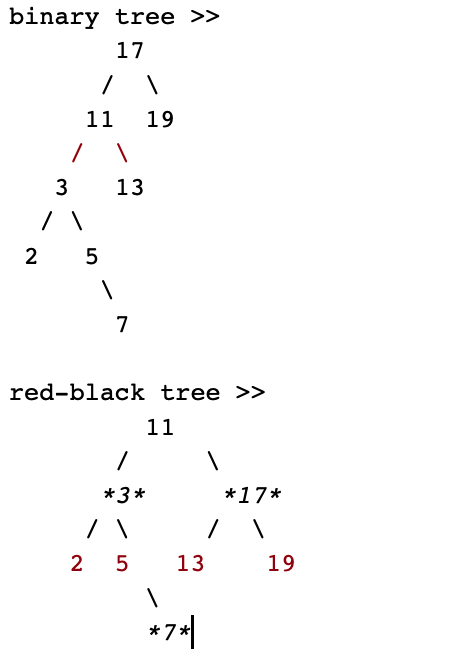

## Q3

Given an array A[] that stores all number from 1 to N (both inclusive and sorted)

Two states in the array.

[X,Z] : Perform union of X and Z i.e. parent of Z will become the parent of X.

[X] : Find the parent of X and print it.


In [46]:
def find(A,X) :
 return A[X]
  
def union_set(A,X,Z) :
 return A[X, Z]

def union_result(arr,N) :
  """
  >>> union_result([[1],[2],[3,2],[4],[3]],4) 
  [1, 2, 4, 2]
  >>> union_result([[2,1],[3,1],[3],[2],[1]],3)
  [1, 1, 1]
  >>> union_result([[2,1],[3,1],[3],[2],[4],[5]],5)
  [1, 1, 4, 5]
  >>> union_result([[2,1],[3,2],[4,3],[5,4],[4],[5]],5) 
  [1, 1]
  >>> union_result([[2,1],[3,2],[5,4],[3],[1],[5],[4]],5)
  [1, 1, 4, 4]
  >>> union_result([[1]],1)
  [1]
  """
  A = []
  return_arr = []
  for i in range(0, N+1):
    A.append(i)
  for item in A:
    if len(item) == 2:
      union_set(A, item[0], item[1])
    else:
      return_arr.append(find(A, item[0]))
  return return_arr

In [ ]:
doctest.run_docstring_examples(union_result, globals(), False, __name__)